# Assignments 2 Continue Random Walk Simulation 

## Learning Objectives
* Implement concepts in random walk simulation
* Apply a stochastic process to design and create simulations 
* Create, implement, and analyze simulations
* Visualize simulation results using Python

# Introduction

In this assignment, you will revise and extend the drunk simulation we covered in the lecture note on random walking simulation.  You will write class definitions as well as revising and expanding the drunk simulation given in the lecture notes. The below cells contain code covered in our lecture. More specifically, to approach the problems in this assignment, you need to use the class definitions such as ```Location```, ```Field```, ```OddField```, ```Location```, ```Drunk```, ```UsualDrunk``` and ```MasochistDrunk``` and some other useful class and function definitions from the lecture notes.  

You are recommend to run the code cells below before approaching the problems in this assignment.  You should NOT change any of the below code when approaching the assignment.   


In [1]:
import random
%matplotlib inline

class Location(object):
    def __init__(self, x, y):
        """x and y are numbers"""
        self.x = x
        self.y = y

    def move(self, deltaX, deltaY):
        """deltaX and deltaY are numbers"""
        return Location(self.x + deltaX, self.y + deltaY)

    def getX(self):
        return self.x

    def getY(self):
        return self.y

    def distFrom(self, other):
        xDist = self.x - other.getX()
        yDist = self.y - other.getY()
        return (xDist**2 + yDist**2)**0.5
    
    def __eq__(self, other):
        if isinstance(other, self.__class__):
            return self.x == other.x and self.y == other.y
        return False

    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'


class Field(object):
    def __init__(self):
        self.drunks = {}
        
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc
            
    def moveDrunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        #use move method of Location to get new location
        self.drunks[drunk] =\
            self.drunks[drunk].move(xDist, yDist)
        
    def getLoc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]

class OddField(Field):
    def __init__(self, numHoles = 1000,
                 xRange = 100, yRange = 100):
        Field.__init__(self)
        self.wormholes = {}
        for w in range(numHoles):
            x = random.randint(-xRange, xRange)
            y = random.randint(-yRange, yRange)
            newX = random.randint(-xRange, xRange)
            newY = random.randint(-yRange, yRange)
            newLoc = Location(newX, newY)
            self.wormholes[(x, y)] = newLoc

    def moveDrunk(self, drunk):
        Field.moveDrunk(self, drunk)
        x = self.drunks[drunk].getX()
        y = self.drunks[drunk].getY()
        if (x, y) in self.wormholes:
            self.drunks[drunk] = self.wormholes[(x, y)]

class Drunk(object):
    def __init__(self, name = None):
        """Assumes name is a str"""
        self.name = name

    def __str__(self):
        if self != None:
            return self.name
        return 'Anonymous'
    
#The usual drunk who wanders around at random 
class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0,1), (0,-1), (1, 0), (-1, 0)]
        return random.choice(stepChoices)
    
#The masochistdrunk who tries to move northward
class MasochistDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0.0,1.1), (0.0,-0.9),
                       (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)

#this class is used in lecture and you may reference lecture code to apply it
#you of course don't need to use it
class styleIterator(object):
    """
    A styleIterator is able to circulate the use of a list of styles when plotting.
    """
    def __init__(self, styles):
        self.index = 0
        self.styles = styles

    def nextStyle(self):
        result = self.styles[self.index]
        if self.index == len(self.styles) - 1:
            self.index = 0
        else:
            self.index += 1
        return result
    
def collectPlotXY(locations):
    """
    locations: a list of Location objects.
    Returns a tuple of two lists, each one maintaining a sequence of x or y values
    """
    xVals, yVals = [], []
    for loc in locations:
        xVals.append(loc.getX())
        yVals.append(loc.getY())
    return xVals, yVals

# Problem 1 Create a SouthDrunk

The first task is to define a ```SouthDrunk``` class that is defined based on the ```Drunk``` class defined in the lecture notes.  From the class, you can create ```SouthDrunk``` objects.  Each SouthDrunk has a bias to walk southward with probability ```p```, which has the default value 0.15. (The overall probability for a SouthDrunk to go southward is ``p + (1-p)*0.25`` based on the implementation of takeStep in SouthDrunk.)

In the skeleton code provided below, the class contains the methods you need to define in the class. If the comment for the method says "do not change," please do **NOT** change it. 

Note that you are expected to define SouthDrunk as a subclass of the Drunk class. 

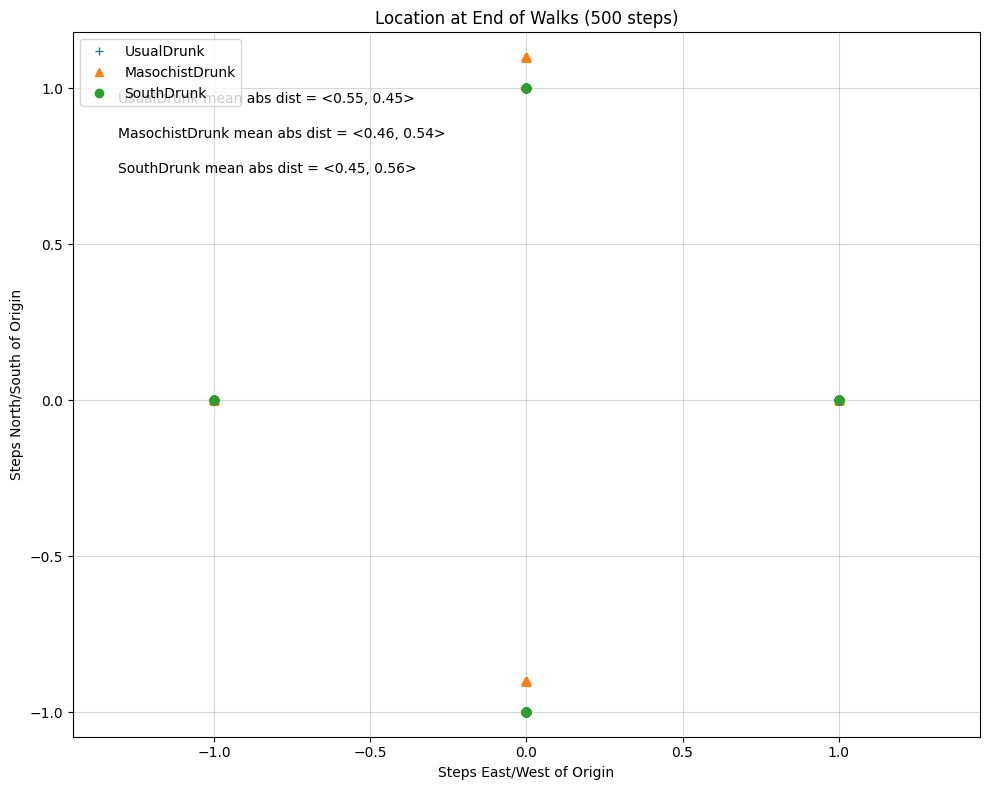

In [2]:
import random
import matplotlib.pyplot as plt

class Location(object):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def move(self, deltaX, deltaY):
        return Location(self.x + deltaX, self.y + deltaY)

    def getX(self):
        return self.x

    def getY(self):
        return self.y

    def distFrom(self, other):
        xDist = self.x - other.getX()
        yDist = self.y - other.getY()
        return (xDist**2 + yDist**2)**0.5

    def __eq__(self, other):
        if isinstance(other, Location):
            return self.x == other.x and self.y == other.y
        return False

    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'


class Field(object):
    def __init__(self):
        self.drunks = {}

    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc

    def moveDrunk(self, drunk): 
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        new_location = drunk.takeStep() 
        self.drunks[drunk] = new_location

    def getLoc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]

class OddField(Field):
    def __init__(self, numHoles=1000, xRange=100, yRange=100):
        Field.__init__(self)
        self.wormholes = {}
        for w in range(numHoles):
            x = random.randint(-xRange, xRange)
            y = random.randint(-yRange, yRange)
            newX = random.randint(-xRange, xRange)
            newY = random.randint(-yRange, yRange)
            newLoc = Location(newX, newY)
            self.wormholes[(x, y)] = newLoc

    def moveDrunk(self, drunk):
        Field.moveDrunk(self, drunk)
        x = self.drunks[drunk].getX()
        y = self.drunks[drunk].getY()
        if (x, y) in self.wormholes:
            self.drunks[drunk] = self.wormholes[(x, y)]


class Drunk(object):
    def __init__(self, name=None):
        self.name = name

    def __str__(self):
        return self.name or 'Anonymous'


class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        return Location(*random.choice(stepChoices))


class MasochistDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0.0, 1.1), (0.0, -0.9), (1.0, 0.0), (-1.0, 0.0)]
        return Location(*random.choice(stepChoices))


class SouthDrunk(Drunk):
    p = 0.15

    @staticmethod
    def set_south_probability(prob):
        SouthDrunk.p = prob

    def gets_southward(self):
        return random.random() < SouthDrunk.p

    def takeStep(self):
        if self.gets_southward():
            return Location(0, -1)
        else:
            directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
            return Location(*random.choice(directions))


def collectPlotXY(locations):
    xVals, yVals = [], []
    for loc in locations:
        xVals.append(loc.getX())
        yVals.append(loc.getY())
    return xVals, yVals


def simWalks(numSteps, numTrials, dClass):
    home = Location(0, 0)
    locs = []
    for i in range(numTrials):
        d = dClass('Drunk' + str(i))
        f = Field()
        f.addDrunk(d, home)
        for _ in range(numSteps):
            f.moveDrunk(d)
        locs.append(f.getLoc(d))
    return locs

def drunkTest():
    numSteps = 500
    numTrials = 200

    # Simulate walks for each drunk type
    usual_walks = simWalks(numSteps, numTrials, UsualDrunk)
    masochist_walks = simWalks(numSteps, numTrials, MasochistDrunk)
    south_walks = simWalks(numSteps, numTrials, SouthDrunk)

    # Collect plot data
    usual_x, usual_y = collectPlotXY(usual_walks)
    masochist_x, masochist_y = collectPlotXY(masochist_walks)
    south_x, south_y = collectPlotXY(south_walks)

    # Calculate mean absolute distances
    def mean_abs_dist(locations):
        x_coords, y_coords = collectPlotXY(locations)
        abs_x_dist = [abs(x) for x in x_coords]
        abs_y_dist = [abs(y) for y in y_coords]
        return sum(abs_x_dist) / len(abs_x_dist), sum(abs_y_dist) / len(abs_y_dist)

    usual_mean_x, usual_mean_y = mean_abs_dist(usual_walks)
    masochist_mean_x, masochist_mean_y = mean_abs_dist(masochist_walks)
    south_mean_x, south_mean_y = mean_abs_dist(south_walks)


    # Plot the results
    plt.figure(figsize=(10, 8))
    plt.plot(usual_x, usual_y, '+', label='UsualDrunk')
    plt.plot(masochist_x, masochist_y, '^', label='MasochistDrunk')
    plt.plot(south_x, south_y, 'o', label='SouthDrunk')

    plt.xlabel('Steps East/West of Origin')
    plt.ylabel('Steps North/South of Origin')
    plt.title('Location at End of Walks (500 steps)')

    plt.annotate(f"UsualDrunk mean abs dist = <{usual_mean_x:.2f}, {usual_mean_y:.2f}>", (0.05, 0.90), xycoords='axes fraction')
    plt.annotate(f"MasochistDrunk mean abs dist = <{masochist_mean_x:.2f}, {masochist_mean_y:.2f}>", (0.05, 0.85), xycoords='axes fraction')
    plt.annotate(f"SouthDrunk mean abs dist = <{south_mean_x:.2f}, {south_mean_y:.2f}>", (0.05, 0.80), xycoords='axes fraction')


    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.5) 
    plt.axis('equal')  
    plt.tight_layout()  
    plt.show()

if __name__ == "__main__":
    drunkTest()

# Problem 2 Create a Dirty Field 

In the lecture notes, there are two class definitions including ```Field``` and ```OddField``` where drunks can walk. (The definitions of ```Field``` and ```OddField``` are presented in earlier code cells in this document.) For this problem, you need to define a ```DirtyField```. 

In the ```__init__``` method, the ```xRange``` and ```yRange``` values are used to specify the boundaries of the dirty tiles in the field. Each dirty tile should be represented as a Locatioin object.  To create a dirty tile, you should use the below code:
```Python
            x = random.randint(-xRange, xRange)
            y = random.randint(-yRange, yRange)
            aDirtyTile = Location(x, y)
``` 
This means each dirty tile is a Location object within the boundary in the ```DirtyField``` object.  

Additionally, the ```dirtyTiles``` is used to denote the number of dirty tiles in the fields. **The dirty title Location objects should be different from each other in the same DirtyField.** This means each dirty tile should be located differently from the other dirty tiles in the 2D space. You need to maintain the dirty tiles as a list of Location objects.  

Note that drunks don't like dirty tiles. When a drunk moves in the field and happens to touch a dirty tile, the drunk cannot stop the move and would keep moving till he or she is able to step on a clean tile. The sequence of the actions occurred during the move would be counted as a single move action in the dirty field at one time step. 

Below provides some skeleton code for you to extend the two methods defined in ```DirtyField```. 

In [3]:
class DirtyField(Field):
    def __init__(self, dirtyTiles=1000, xRange=100, yRange=100):
        super().__init__()
        self.dirtyTiles = []
        w = 0
        while w < dirtyTiles:
            x = random.randint(-xRange, xRange)
            y = random.randint(-yRange, yRange)
            aDirtyTile = Location(x, y)
            if aDirtyTile not in self.dirtyTiles: 
                self.dirtyTiles.append(aDirtyTile)
                w += 1

    def moveDrunk(self, drunk):
        """Moves the drunk, handling dirty tiles."""
        dirty = False
        while True:  # Outer loop: Keep trying until a clean tile is reached
            new_location = drunk.takeStep()  
            is_dirty = False

            for tile in self.dirtyTiles: # Inner loop: Check against all dirty tiles
                if new_location == tile:
                    is_dirty = True
                    dirty = True  
                    break  

            if not is_dirty:  
                self.drunks[drunk] = new_location
                break  

        return dirty


start = Location(0, 0)
f = DirtyField(50)  

homer = SouthDrunk('Homer')
f.addDrunk(homer, start)

for _ in range(100): 
    dirty_move = f.moveDrunk(homer)
    if dirty_move:
        print("Homer stepped on a dirty tile!")

print(f"Homer's final location: {f.getLoc(homer)}")

for p in [0, 0.25, 0.5, 0.75, 1]:
    SouthDrunk.set_south_probability(p)
    f = DirtyField(50)  
    homer = SouthDrunk('Homer')
    f.addDrunk(homer, start)
    for _ in range(100):
        f.moveDrunk(homer)
    print(f"Probability: {p}, Homer's final location: {f.getLoc(homer)}")


Homer's final location: <-1, 0>
Probability: 0, Homer's final location: <0, 1>
Probability: 0.25, Homer's final location: <-1, 0>
Probability: 0.5, Homer's final location: <0, -1>
Probability: 0.75, Homer's final location: <0, 1>
Probability: 1, Homer's final location: <0, -1>


# Problem 3 Create a Walk Simulation

In this problem, you will define a function for a ```SouthDrunk``` to run a number of steps in a ```DirtyField```. In this simulation, you need to create a plot that shows all the places using **blue** color the drunk visited during the walk in the ```DirtyField```. In addition to the visited locations, you also need to mark the dirty tiles **red** in the dirty field.  You should start the walk at location ```(0,0)```.  You may reference the below picture when implementing your plot. 


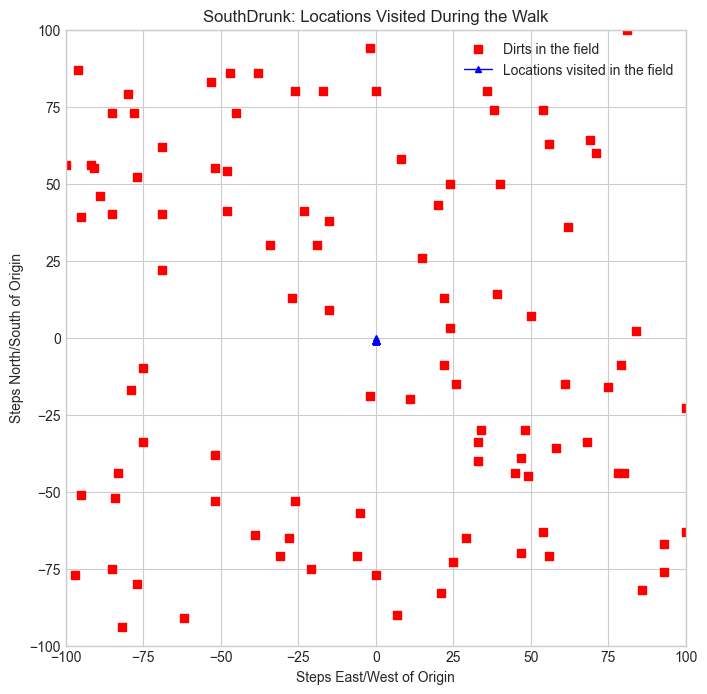

In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')


def plotDrunkLocsInDirtyField(locations, f):
    """Plots dirty tiles and drunk's path, matching the example style."""

    plt.figure(figsize=(8, 8))  

    
    dirty_x, dirty_y = collectPlotXY(f.dirtyTiles)
    plt.scatter(dirty_x, dirty_y, c='red', marker='s', label='Dirts in the field', s=30)  

    
    drunk_x, drunk_y = collectPlotXY(locations)
    plt.plot(drunk_x, drunk_y, c='blue', marker='^', linestyle='-', linewidth=1, markersize=5, label='Locations visited in the field')  

    plt.xlabel('Steps East/West of Origin')
    plt.ylabel('Steps North/South of Origin')
    plt.title('SouthDrunk: Locations Visited During the Walk')  
    plt.xlim(-100, 100)  
    plt.ylim(-100, 100) 
    plt.grid(True)      
    plt.legend()
    plt.show()


def runSimulation1(dDrunk, dirtyTiles, xRange, yRange, numSteps):
    """
    Runs a number of steps in a DirtyField and plots the results.

    Parameters
    dDrunk: class of drunk walking in the dirty field 
    dirtyTiles: int, number of dirty tiles in the field 
    xRange: int, X boundary from the center in the field
    yRange: int, Y boundary from the center in the field
    numSteps: int, number of steps for the drunk to walk in the field
    """

    field = DirtyField(dirtyTiles, xRange, yRange)
    drunk = dDrunk("Drunk")  
    start = Location(0, 0)
    field.addDrunk(drunk, start)

    locations_visited = [start]  

    for _ in range(numSteps):
        field.moveDrunk(drunk)  
        locations_visited.append(field.getLoc(drunk)) 

    plotDrunkLocsInDirtyField(locations_visited, field)  
    plt.show()


 
random.seed(0)
runSimulation1(SouthDrunk, 100, 100, 100, 500)

# Problem 4 Create a Multiple-Walk Simulation

In this problem, you will define a function ```runSimulation2``` that runs ```numTrials``` trials of the multiple-walk simulation by a drunk in ```a DirtyField```.  For each walk simulation, your simulation should print the mean number of distances between the final locations and the start location as well as the maximum and minimum distances between the final locations and the start location across the multiple trials. 

You should start each walk at location ```(0,0)```.  When you define the function ```runSimulation2```, you may need to define several helper functions first and use them to modularize your function definition of ```runSimulation2```.  Please feel free to reuse the code provided in the lecture notebook. If you run the test code following ```runSimlation2``` definition, your output should be similar to the below:

<code>
SouthDrunk random walk of 10 steps
 Mean = 5.614
 Max = 10.0 Min = 1.4
SouthDrunk random walk of 100 steps
 Mean = 50.852
 Max = 66.1 Min = 28.3
SouthDrunk random walk of 1000 steps
 Mean = 495.89
 Max = 555.1 Min = 441.1
SouthDrunk random walk of 10 steps
 Mean = 5.226
 Max = 9.1 Min = 0.0
SouthDrunk random walk of 100 steps
 Mean = 48.939
 Max = 70.2 Min = 29.0
SouthDrunk random walk of 1000 steps
 Mean = 502.793
 Max = 580.1 Min = 448.5
SouthDrunk random walk of 10 steps
 Mean = 5.34
 Max = 10.0 Min = 1.4
SouthDrunk random walk of 100 steps
 Mean = 50.351
 Max = 69.2 Min = 33.1
SouthDrunk random walk of 1000 steps
 Mean = 499.571
 Max = 551.1 Min = 451.0
</code>


In [ ]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')

def walk(f, d, numSteps):
    """Moves d numSteps times, and returns the distance."""
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))

def simWalksInDirtyField(numSteps, numTrials, dClass, dirtyTiles, xRange, yRange):
    """Simulates numTrials walks of numSteps steps each.
    Returns a list of the final distances for each trial"""
    distances = []
    for t in range(numTrials):
        f = DirtyField(dirtyTiles, xRange, yRange)
        drunk = dClass('Drunk' + str(t))
        f.addDrunk(drunk, Location(0, 0))
        distances.append(walk(f, drunk, numSteps))
    return distances

def getMeanAndStd(X):
    mean = sum(X)/float(len(X))
    std = (sum([(i-mean)**2 for i in X])/float(len(X)))**0.5
    return mean, std

def runSimulation2(dDrunk, dirtyTiles, xRange, yRange, numTrials, walkLengths):
    """
    Runs multiple trials of the multiple-walk simulation.
    """
    for numSteps in walkLengths:
        distances = simWalksInDirtyField(numSteps, numTrials, dDrunk, dirtyTiles, xRange, yRange)
        mean_distance, _ = getMeanAndStd(distances)
        max_distance = max(distances)
        min_distance = min(distances)

        print(f"{dDrunk.__name__} random walk of {numSteps} steps")
        print(f" Mean = {mean_distance:.3f}")
        print(f" Max = {max_distance:.1f} Min = {min_distance:.1f}")


numTrials = 3
walkLengths = [10, 100, 1000]
dirtyTiles = 1000
xRange = 100
yRange = 100

random.seed(0)
runSimulation2(SouthDrunk, dirtyTiles, xRange, yRange, numTrials, walkLengths)
runSimulation2(SouthDrunk, dirtyTiles, xRange, yRange, numTrials, walkLengths)
runSimulation2(SouthDrunk, dirtyTiles, xRange, yRange, numTrials, walkLengths)

SouthDrunk random walk of 10 steps
 Mean = 1.000
 Max = 1.0 Min = 1.0
SouthDrunk random walk of 100 steps
 Mean = 1.000
 Max = 1.0 Min = 1.0
SouthDrunk random walk of 1000 steps
 Mean = 1.000
 Max = 1.0 Min = 1.0
SouthDrunk random walk of 10 steps
 Mean = 1.000
 Max = 1.0 Min = 1.0
SouthDrunk random walk of 100 steps
 Mean = 1.000
 Max = 1.0 Min = 1.0
SouthDrunk random walk of 1000 steps
 Mean = 1.000
 Max = 1.0 Min = 1.0


# Problem 5 Create a Final-Location Simulation

In this problem, you will define a function ```runSimulation3``` that runs numTrials trials of a single-walk simulation by some drunk from any of the ```DrunkKinds``` in a ```DirtyField```. The length of the single-walk simulation must have numSteps. The dirty field must have ```dirtyTiles``` number of dirty tiles which are located randomly within ```fXLimit``` and ```fYLimit``` as the limits of the xy axes.  

For each trial, you should create a new DirtyField and start the drunk at location ```(0,0)```. The simulation should plot the distribution of all of the final locations for the single-walk simulations across the multiple simulation trials.  The plot should also display the the mean numbers of ```(x,y)``` distances between the final locations and the start location ```(0,0)``` across the multiple trials of the single-walks. Your plotted picture should be similar to the picture provided below. 

Hint: You should reference the lecture code that addresses similar task.  Note that you should identify which part of the lecture code that addresses a similar problem to this one.  Then, you need to make some revision so that the code is able to resolve this problem.   Feel free to ask if you have any questions or problems. 



In [ ]:
import random
import matplotlib.pyplot as plt

    
    def runSimulation3(drunkKinds, dirtyTiles, fXLimit, fYLimit, numSteps, numTrials):
        plt.figure(figsize=(10, 8))

        for dDrunk, marker, color in zip(drunkKinds, ['+', '^', 'o'], ['black', 'red', 'm']):
            final_locations = []
            for _ in range(numTrials):
                field = DirtyField(dirtyTiles, fXLimit, fYLimit)
                drunk = dDrunk("Drunk")
                start_location = Location(0, 0)
                field.addDrunk(drunk, start_location)

                for _ in range(numSteps):
                    field.moveDrunk(drunk)

                final_location = field.getLoc(drunk)
                final_locations.append(final_location)

            x_coords, y_coords = collectPlotXY(final_locations)
            plt.scatter(x_coords, y_coords, marker=marker, s=20, c=color, label=f"{dDrunk.__name__}")

            x_distances = [abs(loc.getX()) for loc in final_locations]
            y_distances = [abs(loc.getY()) for loc in final_locations]
            mean_x_distance = sum(x_distances) / len(x_distances)
            mean_y_distance = sum(y_distances) / len(y_distances)

            plt.annotate(f"{dDrunk.__name__} mean abs dist = <{mean_x_distance:.2f}, {mean_y_distance:.2f}>",
                     (0.05, 0.95 - 0.05 * drunkKinds.index(dDrunk)), xycoords='axes fraction', fontsize=10)

        plt.xlabel('Steps East/West of Origin')
        plt.ylabel('Steps North/South of Origin')
        plt.title(f"Location at End of Walks ({numSteps} steps)")
        plt.xlim(-fXLimit, fXLimit)
        plt.ylim(-fYLimit, fYLimit)
        plt.grid(True)
        plt.legend(loc='upper left', fontsize=10)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()

%matplotlib inline

numTrials = 100
numSteps = 500
dirtyTiles = 100
fXLimit = 100
fYLimit = 100


runSimulation3([UsualDrunk, MasochistDrunk, SouthDrunk], dirtyTiles, fXLimit, fYLimit, numSteps, numTrials)

# Problem 6 Reflection

* What strategies did you use to solve the problems?

Modular Design: I broke down the problem into smaller, manageable modules. This involved creating separate classes for Location, Drunk (and its subclasses), Field, and DirtyField. This modularity made the code easier to understand, debug, and extend. Each class had a specific responsibility, promoting code reusability and maintainability.

Incremental Development: I started with a basic implementation of each class and then gradually added more complex features, like the different drunk behaviors and the dirty tile interactions. This incremental approach allowed me to test each part of the code as I developed it, making it easier to identify and fix bugs early on.

Visualization: I used Matplotlib to visualize the drunk's walks and the distribution of final locations. Visualizing the data helped me understand the behavior of the different drunk types more intuitively and verify that my code was working correctly.

Testing and Debugging: I wrote test code to verify the functionality of each class and function. I used print statements strategically to track the values of variables and identify the source of errors. I also used the debugger in my IDE to step through the code and examine the state of objects.

  
* What were the most challenging aspects of this assignment? How did you overcome these challenges? If you couldn’t fully overcome them, what steps did you take to try?

Random Seed and Reproducibility: Initially, I struggled to get consistent output for testing. I realized that the random.seed() function needed to be called before any other use of the random module, including within class and function definitions. Placing the random.seed(0) call at the very beginning of the script solved this issue.

Class Interactions: Ensuring that the different classes interacted correctly was challenging. For example, making sure the DirtyField correctly updated the drunk's location after a step and handled dirty tile interactions required careful attention to detail and testing. I used print statements and the debugger to trace the execution flow and ensure that the objects were being updated as expected.

Plotting with Matplotlib: Getting the plots to look exactly as desired (with different markers, labels, annotations, and the correct title) required some experimentation with Matplotlib's various plotting functions and options. I consulted the Matplotlib documentation and online examples to learn how to customize the plots.

SouthDrunk Logic: Initially, the SouthDrunk class's takeStep() method was not correctly prioritizing the southward movement based on the probability p. I realized that the else block (which handles the random movement in other directions) was being executed even when it shouldn't be. Modifying the else block to exclude southward movement solved this.


  
* What are the key takeaways or lessons you learned from this assignment? How do you think the skills and concepts in this assignment might apply to real-world siutations or future projects?

Object-Oriented Programming: This assignment reinforced the importance of OOP principles like encapsulation, inheritance, and polymorphism. These principles are crucial for developing complex software systems.

Random Processes and Simulation: I learned how to simulate random processes using Python's random module. This skill is applicable to many real-world scenarios, such as modeling traffic flow, simulating financial markets, or studying disease spread.

Data Visualization: I gained experience in using Matplotlib to visualize data. Data visualization is essential for understanding complex data sets and communicating insights effectively.

Testing and Debugging: I learned the importance of writing test code and using debugging tools to identify and fix errors. These skills are crucial for developing reliable software.

# Turn-in
You need to turn in at least one file for your submission:

* Your notebook file that contains the code and presentation

* Any other supplementary documents you want to submit to D2L Assignments folder 

You need to package the files into a zip archive and upload the zip file to D2L assignment folder <b>Assignment 2</b>

